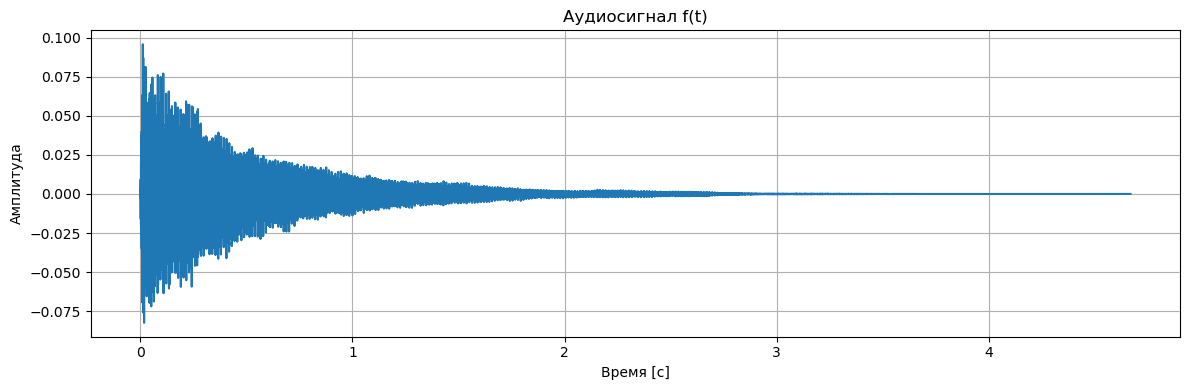

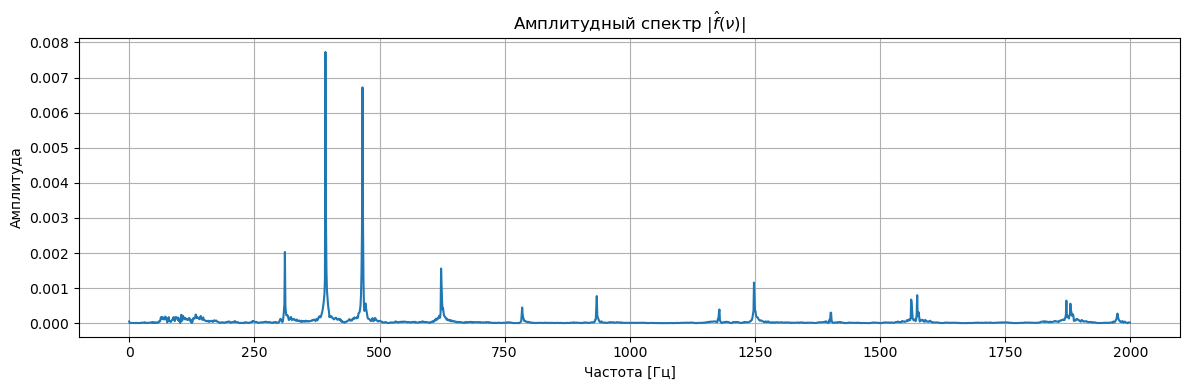

Основные частоты (Гц):
311.00 Гц
392.00 Гц
466.00 Гц
623.00 Гц
1248.00 Гц
1574.00 Гц


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy.integrate import trapz
import librosa


filename = "Аккорд (12).mp3"  # замените на нужный файл
y, fs = librosa.load(filename, sr=None, mono=True)

# Временная ось
N = len(y)
t = np.linspace(0, N / fs, N)

# Построение временного сигнала
plt.figure(figsize=(12, 4))
plt.plot(t, y)
plt.title("Аудиосигнал f(t)")
plt.xlabel("Время [с]")
plt.ylabel("Амплитуда")
plt.grid(True)
plt.tight_layout()
plt.savefig("audio_signal.png")
plt.show()

# Параметры спектра
V = 2000  # максимальная частота анализа (в Гц)
dv = 1    # шаг по частоте
v = np.arange(0, V, dv)

# Численное интегрирование
Y = []
for nu in v:
    exponent = np.exp(-2j * np.pi * nu * t)
    Y.append(trapz(y * exponent, t))
Y = np.array(Y)

# Спектр
plt.figure(figsize=(12, 4))
plt.plot(v, np.abs(Y))
plt.title("Амплитудный спектр $|\\hat{f}(\\nu)|$")
plt.xlabel("Частота [Гц]")
plt.ylabel("Амплитуда")
plt.grid(True)
plt.tight_layout()
plt.savefig("audio_spectrum.png")
plt.show()

# Печать локальных максимумов
from scipy.signal import find_peaks

peaks, _ = find_peaks(np.abs(Y), height=np.max(np.abs(Y)) * 0.1)
print("Основные частоты (Гц):")
for freq in v[peaks]:
    print(f"{freq:.2f} Гц")
